In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statistics
import datetime
import os

In [2]:
# Find data files.
data_dir = 'C:/Users/Ian/projects/ooi-profiler-investigation/data/CE02SHSM' # Directory where data is located.

files = ['/'.join((data_dir,f)) for f in os.listdir(data_dir)]
met_files = [file for file in files if 'METBK' in file]
acs_files = [file for file in files if 'OPTAA' in file]
flort_files = [file for file in files if 'FLORT' in file]

In [3]:
def import_data(files):
    """
    Files must be a list of absolute path OOI NetCDF files that contain the same data.
    :param files: A list of absolute filepaths.
    :return: A pandas dataframe from the
    """
    df = pd.DataFrame()
    for file in files:
        ds = xr.open_dataset(file)
        df = pd.concat([df,ds.to_dataframe()])
    df.index = df.time
    return df

In [4]:
# Miscellaneous objects.
dtfmt = mdates.DateFormatter('%Y-%m-%dT%H:%M:%SZ') # Date format for xaxis on plots.

# Set up limits.
bdt = datetime.datetime(2019,6,23,0,0,0) #Used to limit the dataset during plotting so it doesn't take forever.
edt = datetime.datetime(2019,6,29,0,0,0)
pbdt = datetime.datetime(2019,6,25,0,0,0)
pedt = datetime.datetime(2019,6,27,3,0,0)

# MET DATA

In [5]:
df = import_data(met_files)

In [6]:
df = df[(df.index >= bdt) & (df.index <= edt)]
df = df.resample('600S').mean()

Text(0.5, 1.0, 'SST')

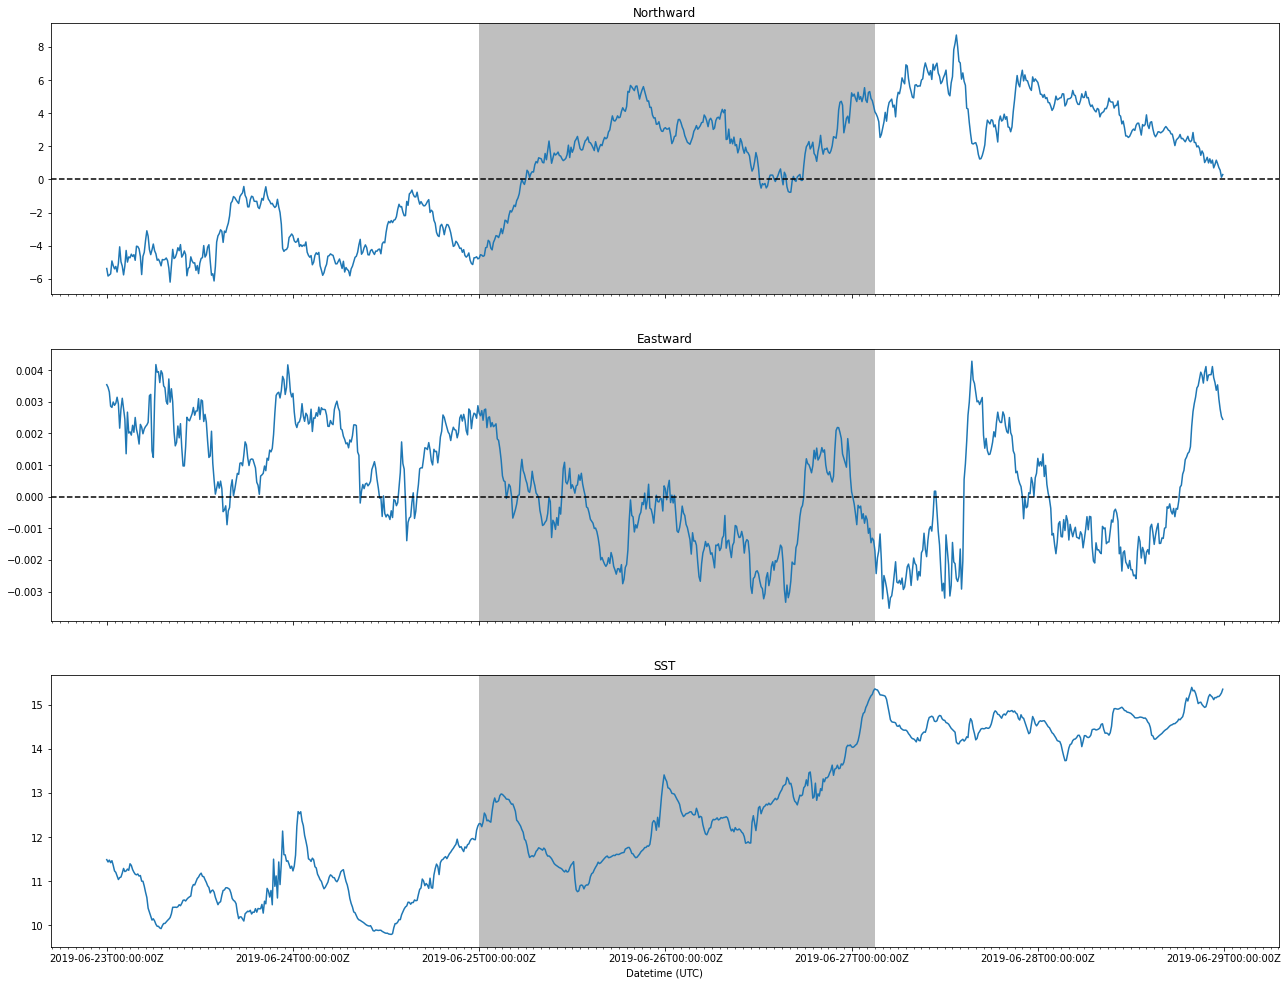

In [7]:
rolling = df.rolling('3600S').mean()

fig,ax = plt.subplots(3,1,figsize=(22,17),sharex = True)
ax[0].plot(df.index,df.northward_wind_velocity)
ax[1].plot(df.index,df.eastward_wind_velocity/1000)
ax[2].plot(df.index,df.sea_surface_temperature)

for i in range(3):
    ax[i].axvspan(pbdt,pedt,facecolor = 'gray',alpha = 0.5)
    ax[i].xaxis.set_major_formatter(dtfmt)
    ax[i].xaxis.set_major_locator(mdates.DayLocator())
    ax[i].xaxis.set_minor_locator(mdates.HourLocator())

ax[0].axhline(0,color = 'black',linestyle = '--')
ax[1].axhline(0,color = 'black',linestyle = '--')

ax[-1].set_xlabel('Datetime (UTC)')
ax[0].set_title('Northward')
ax[1].set_title('Eastward')
ax[2].set_title('SST')

# 7M ACS

In [8]:
df = import_data(acs_files)

In [9]:
df = df[(df.index >= bdt) & (df.index <= edt)]
#df = df[(df.index >= pbdt) & (df.index <= pedt)]

C660 = df[df.wavelength_c == 658.5]
C660 = C660[['beam_attenuation']]
C660 = C660[C660['beam_attenuation'] <= 10]

A650 = df[df.wavelength_a == 650.7]
A650 = A650[['optical_absorption']]

A676 = df[df.wavelength_a == 677.2]
A676 = A676[['optical_absorption']]

A715 = df[df.wavelength_a == 715.3]
A715 = A715[['optical_absorption']]

Text(0.5, 0, 'Datetime (UTC)')

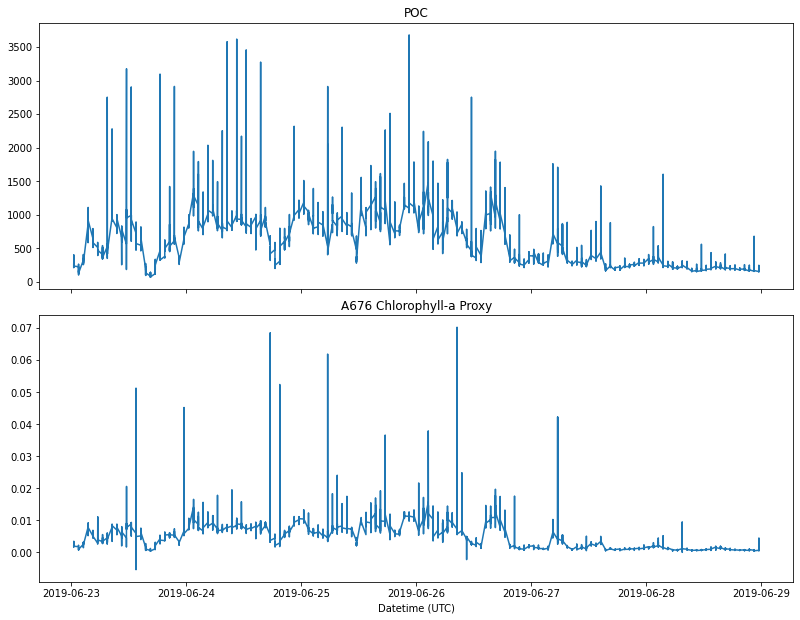

In [10]:
num_plots = 2
fig,ax = plt.subplots(num_plots,1 ,figsize = (11,8.5), constrained_layout=True,sharex = True)
p1 = ax[0].plot(C660.index,C660.beam_attenuation*380)  #Global Relationship Gardner et al 2006.
p2 = ax[1].plot(A676.index,A676.optical_absorption*0.020)
#
# for i in range(num_plots):
#     ax[i].xaxis.set_major_formatter(dtfmt)
#     ax[i].xaxis.set_major_locator(mdates.DayLocator(7))
#     ax[i].xaxis.set_minor_locator(mdates.HourLocator())


ax[0].set_title('POC')
ax[1].set_title('A676 Chlorophyll-a Proxy')

ax[-1].set_xlabel('Datetime (UTC)')

# FLORT Data

In [11]:
df = import_data(flort_files)

In [12]:
df = df[(df.index >= bdt) & (df.index <= edt)]
df = df.resample('3600S').mean()

Text(0.5, 0, 'Datetime (UTC)')

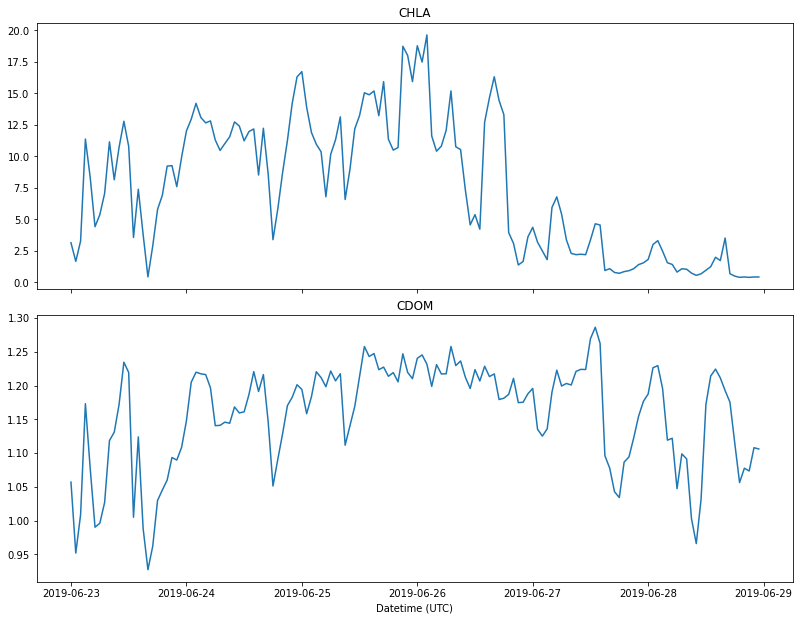

In [13]:
num_plots = 2
fig,ax = plt.subplots(num_plots,1 ,figsize = (11,8.5), constrained_layout=True,sharex = True)
p1 = ax[0].plot(df.index,df.fluorometric_chlorophyll_a)  #Global Relationship Gardner et al 2006.
p2 = ax[1].plot(df.index,df.fluorometric_cdom)
#
# for i in range(num_plots):
#     ax[i].xaxis.set_major_formatter(dtfmt)
#     ax[i].xaxis.set_major_locator(mdates.DayLocator(7))
#     ax[i].xaxis.set_minor_locator(mdates.HourLocator())


ax[0].set_title('CHLA')
ax[1].set_title('CDOM')

ax[-1].set_xlabel('Datetime (UTC)')